In previous class we have seen the confidence interval for x coefficient that is the b. For the b we have found that what was lower & upper limit.

In this class we will find the confidence interval for y and prediction interval.

In [1]:
import pandas as pd
import matplotlib as mpl
import numpy as np
import statsmodels.api as sm
from statsmodels.formula.api import ols
from sklearn.linear_model import LinearRegression
from scipy import stats
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
data = pd.read_excel('Icecream.xlsx')
data

,Student_Population,Sales
0,2,58
1,6,105
2,8,88
3,8,118
4,12,117
5,16,137
6,20,157
7,20,169
8,22,149
9,26,202


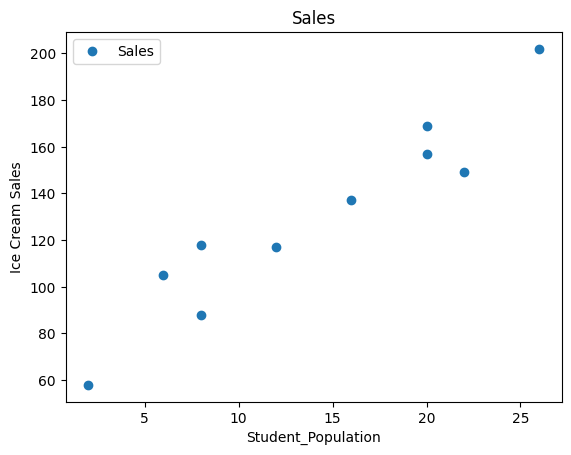

In [3]:
data.plot('Student_Population','Sales',style='o') # x-axis
plt.ylabel('Ice Cream Sales') # dont write label it now shows error
plt.title('Sales')
plt.show()

In [4]:
# throws error
#St_pop = data['Population']
#sales = data['Sales']
#st_pop = s.add_constant(St_pop)
#model1 = sm.OLS(sales, st_pop).fit()
#result1 = model1.fit()
#print(result1.summary())


Reg1 = ols(formula = "Sales ~ Student_Population", data=data)
Fit1 = Reg1.fit()
Fit1.summary()

d:\Python311\Lib\site-packages\scipy\stats\_stats_py.py:1806: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.903
Model:                            OLS   Adj. R-squared:                  0.891
Method:                 Least Squares   F-statistic:                     74.25
Date:                Sun, 17 Mar 2024   Prob (F-statistic):           2.55e-05
Time:                        22:50:25   Log-Likelihood:                -39.342
No. Observations:                  10   AIC:                             82.68
Df Residuals:                       8   BIC:                             83.29
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept             60.0000      9.226      6.503      0.000      38.725      81.275
Student_Population     5.0000      0.580      8.617      0.000       3.662       6.338
==============================================================================
Omnibus:                        0.928   Durbin-Watson:                   3.224
Prob(Omnibus):                  0.629   Jarque-Bera (JB):                0.616
Skew:                          -0.060   Prob(JB):                        0.735
Kurtosis:                       1.790   Cond. No.                         33.6
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [5]:
x = data['Student_Population'].values.reshape(-1,1)
y = data['Sales'].values.reshape(-1,1)

In [6]:
reg = LinearRegression()
reg.fit(x,y)

LinearRegression()

In [7]:
reg.intercept_[0], reg.coef_[0][0]

(60.0, 5.0)

In [8]:
reg.predict(np.array([[10]])) # above data is a 2d array so use 2d array format
# for i/p:10k students its  o/p:$110k

array([[110.]])

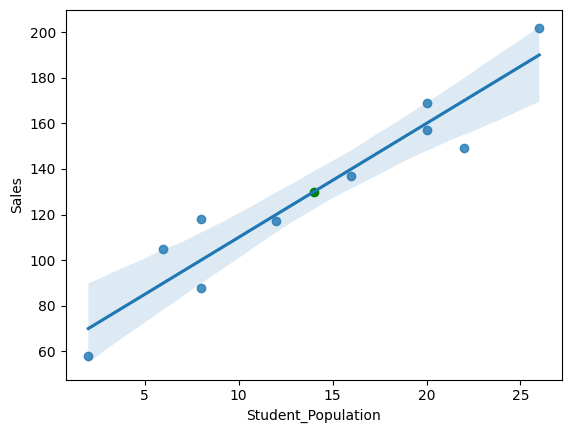

In [9]:
# point estimate
#x = data['Population'].values.reshape(-1,1)
#y = data['Sales'].values.reshape(-1,1)
plt.figure()
sns.regplot(data=data,x='Student_Population',y='Sales', fit_reg=True) # throws error
plt.scatter(np.mean(x), np.mean(y), color = "green")

In [10]:
# Prediction Interval
# result1 has thrown error in statsmodel.api cell so it is showing error
#from statsmodels.stats.outliers_influence import summary_table

#st, data1, ss2 = summary_table(Fit1, alpha=0.05)
#fittedvalues = data[:2]
#fittedvalues = data[:,2] # 2, we are reffering 3rd column
#predict_mean_se = data1[:3]
#predict_mean_se = np.sqrt(ss2[:, 3])  # Column 3 has std err for the mean prediction
#predict_mean_se = data1[:,3] # 3, we are reffering 4th column 
#predict_mean_ci_low, predict_mean_ci_upp = data1[:,4:6].T
#predict_mean_ci_low, predict_mean_ci_upp = ss2[:, 4:6].T  # Columns 4 and 5 have the CI for the mean prediction
# ci_low means confidence interval lower limit and ci_upp is upper limit
# in summary table we are reffering 4th to 6th column
#predict_ci_low, predict_ci_upp = data1[:,6:8].T # 6th to 8th column
# we are calling diff columns for a particular value

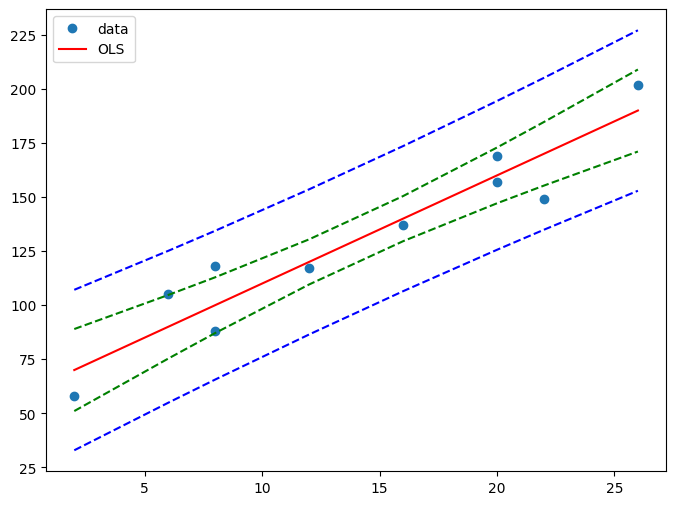

In [11]:
from statsmodels.stats.outliers_influence import summary_table

st, data1, ss2 = summary_table(Fit1, alpha=0.05)

# Extracting the relevant values from the data1 array
fittedvalues = data1[:, 2] # Linear Regression Line - Red
predict_mean_se = np.sqrt(data1[:, 3]) # all rows from 3rd column
predict_mean_ci_low, predict_mean_ci_upp = data1[:, 4], data1[:, 5]
predict_ci_low, predict_ci_upp = data1[:, 6], data1[:, 7]

X = sm.add_constant(x)
fig, ax = plt.subplots(figsize=(8, 6))

ax.plot(x, y, 'o', label='data') # Blue dotted data values
ax.plot(x, fittedvalues, 'r-', label='OLS')  # Using the calculated fitted values

ax.plot(x, predict_ci_low, 'b--') # Prediction Interval Line - Low
ax.plot(x, predict_ci_upp, 'b--') # Prediction Interval Line - High

ax.plot(x, predict_mean_ci_low, 'g--') # Confidence Interval Line - Low
ax.plot(x, predict_mean_ci_upp, 'g--') # Confidence Interval Line - High

ax.legend(loc='best')

plt.show()

In [12]:
pd.DataFrame(data1)

,0,1,2,3,4,5,6,7,8,9,10,11
0,1.0,58.0,70.0,8.222586,51.038683,88.961317,32.898342,107.101658,-12.0,11.119311,-1.079204,0.318447
1,2.0,105.0,90.0,6.377640,75.293135,104.706865,54.881723,125.118277,15.0,12.270929,1.222401,0.201819
2,3.0,88.0,100.0,5.589855,87.109771,112.890229,65.602914,134.397086,-12.0,12.649250,-0.948673,0.087877
3,4.0,118.0,100.0,5.589855,87.109771,112.890229,65.602914,134.397086,18.0,12.649250,1.423009,0.197723
4,5.0,117.0,120.0,4.524581,109.566298,130.433702,86.446108,153.553892,-3.0,13.068212,-0.229565,0.003159
5,6.0,137.0,140.0,4.524581,129.566298,150.433702,106.446108,173.553892,-3.0,13.068212,-0.229565,0.003159
6,7.0,157.0,160.0,5.589855,147.109771,172.890229,125.602914,194.397086,-3.0,12.649250,-0.237168,0.005492
7,8.0,169.0,160.0,5.589855,147.109771,172.890229,125.602914,194.397086,9.0,12.649250,0.711505,0.049431
8,9.0,149.0,170.0,6.377640,155.293135,184.706865,134.881723,205.118277,-21.0,12.270929,-1.711362,0.395566
9,10.0,202.0,190.0,8.222586,171.038683,208.961317,152.898342,227.101658,12.0,11.119311,1.079204,0.318447


In [13]:
st

Obs,Dep Var,Predicted,Std Error,Mean ci,Mean ci,Predict ci,Predict ci,Residual,Std Error,Student,Cook's
,Population,Value,Mean Predict,95% low,95% upp,95% low,95% upp,,Residual,Residual,D
1.0,58.0,69.99999999999993,8.222585693865268,51.03868338928038,88.96131661071948,32.898341547840026,107.10165845215982,-11.999999999999929,11.119311332409138,-1.0792035263032769,0.3184474325136626
2.0,105.0,89.99999999999994,6.377640298311584,75.29313510033796,104.70686489966192,54.88172260110566,125.11827739889424,15.000000000000057,12.270929232350424,1.2224013125635877,0.20181932943876052
3.0,88.0,99.99999999999994,5.589854995725688,87.10977126561956,112.89022873438033,65.60291394444249,134.3970860555574,-11.999999999999943,12.649249824663936,-0.9486728593660895,0.08787685396914853
4.0,118.0,99.99999999999994,5.589854995725688,87.10977126561956,112.89022873438033,65.60291394444249,134.3970860555574,18.000000000000057,12.649249824663936,1.4230092890491455,0.19772292143058734
5.0,117.0,119.99999999999996,4.524580752502434,109.56629807543695,130.43370192456297,86.44610800310323,153.55389199689668,-2.9999999999999574,13.06821215829023,-0.2295646844160556,0.003158671742239181
6.0,137.0,139.99999999999997,4.524580752502434,129.56629807543695,150.433701924563,106.44610800310325,173.5538919968967,-2.9999999999999716,13.06821215829023,-0.22956468441605668,0.003158671742239211
7.0,157.0,160.0,5.5898549957256884,147.10977126561963,172.89022873438037,125.60291394444255,194.39708605555745,-3.0,12.649249824663935,-0.23716821484152353,0.0054923033730718395
8.0,169.0,160.0,5.5898549957256884,147.10977126561963,172.89022873438037,125.60291394444255,194.39708605555745,9.0,12.649249824663935,0.7115046445245706,0.049430730357646564
9.0,149.0,170.0,6.377640298311586,155.29313510033802,184.70686489966198,134.8817226011057,205.1182773988943,-21.0,12.270929232350424,-1.7113618375890167,0.39556588569996803


In [14]:
data

,Student_Population,Sales
0,2,58
1,6,105
2,8,88
3,8,118
4,12,117
5,16,137
6,20,157
7,20,169
8,22,149
9,26,202


In [15]:
ss2

['Obs',
 'Dep Var\nPopulation',
 'Predicted\nValue',
 'Std Error\nMean Predict',
 'Mean ci\n95% low',
 'Mean ci\n95% upp',
 'Predict ci\n95% low',
 'Predict ci\n95% upp',
 'Residual',
 'Std Error\nResidual',
 'Student\nResidual',
 "Cook's\nD"]

In [16]:
fittedvalues
# data1[:, 2]

array([ 70.,  90., 100., 100., 120., 140., 160., 160., 170., 190.])

In [17]:
predict_mean_se

array([2.86750513, 2.52539904, 2.36428742, 2.36428742, 2.12710619,
       2.12710619, 2.36428742, 2.36428742, 2.52539904, 2.86750513])

In [18]:
predict_mean_ci_low

array([ 51.03868339,  75.2931351 ,  87.10977127,  87.10977127,
       109.56629808, 129.56629808, 147.10977127, 147.10977127,
       155.2931351 , 171.03868339])

In [19]:
predict_mean_ci_upp

array([ 88.96131661, 104.7068649 , 112.89022873, 112.89022873,
       130.43370192, 150.43370192, 172.89022873, 172.89022873,
       184.7068649 , 208.96131661])

In [20]:
predict_ci_low

array([ 32.89834155,  54.8817226 ,  65.60291394,  65.60291394,
        86.446108  , 106.446108  , 125.60291394, 125.60291394,
       134.8817226 , 152.89834155])

In [21]:
predict_ci_upp

array([107.10165845, 125.1182774 , 134.39708606, 134.39708606,
       153.553892  , 173.553892  , 194.39708606, 194.39708606,
       205.1182774 , 227.10165845])

In [22]:
# throw error above made 4 cells above for graph
#X = sm.add_constant(x)
#fig, ax = plt.subplots(figsize=(8,6))
#ax.plot(X,y, 'o',label='data')
#ax.plot(X, fittedvalues, 'r-',label='OLS') # throws error 
#ax.plot(X, predict_ci_low, 'b--')
#ax.plot(X, predict_ci_upp, 'b--')
#ax.plot(X, predict_mean_ci_low, 'g--')
#ax.plot(X, predict_mean_ci_upp, 'g--')
#ax.legend(loc='best')
#plt.show()

Summary: Point Interval, Confidence Interval, Prediction Interval. Point interval is same for particular value of x for both confidence and prediction interval. Confidence interval is not the straight line it is curved line similarly the prediction interval. The prediction interval is having mor margin of error when compared to confidence interval